In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
from sklearn.cluster import KMeans


In [115]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


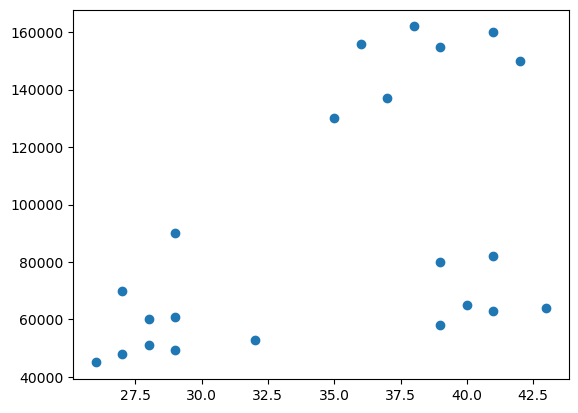

In [116]:
plt.scatter(df["Age"],df["Income($)"])

In [117]:
km = KMeans(n_clusters=3, max_iter=20)
preds = km.fit_predict(df[["Age", "Income($)"]])

df["cluster"] = preds
df.head()

c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


<Axes: xlabel='Age', ylabel='Income($)'>

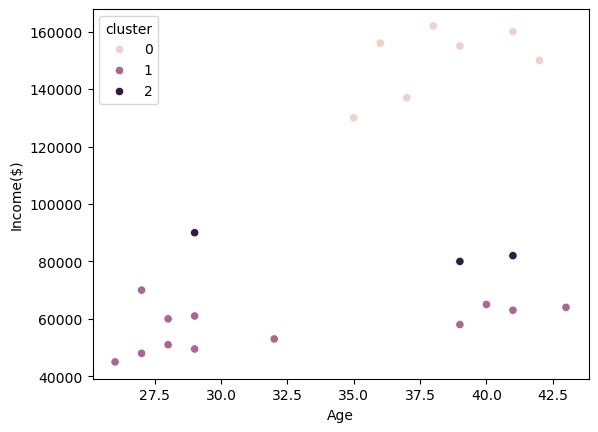

In [118]:
import seaborn as sns
sns.scatterplot(data=df, x=df["Age"], y=df["Income($)"], hue="cluster")

In [119]:
#   The Data is wrong, the problem is that the y- axis is very large, when x -axis is narrow : means computer understands data on a completely other scale!!!
#   thats why we do preprocessing with scaler!


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[["Age", "Income($)"]])
scaled_df

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653],
       [ 0.72533193,  1.51904783],
       [ 1.07222982,  1.63667914],
       [ 0.55188299,  1.68373166],
       [ 0.20498511,  1.54257409],
       [ 0.03153617,  0.93089133],
       [ 0.37843405,  1.09557515],
       [-1.5295043 , -1.06884077],
       [-1.35605536, -0.99826199],
       [-1.18260641, -0.92768321],
       [-1.00915747, -0.9629726 ],
       [-0.48881065, -0.88063069],
       [ 0.89878087, -0.59831557],
       [ 1.07222982, -0.64536809],
       [ 1.4191277 , -0.62184183],
       [ 0.72533193, -0.24542167],
       [ 1.07222982, -0.19836915],
       [ 0.72533193, -0.76299939]])

In [131]:
df["cluster"] = preds

c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


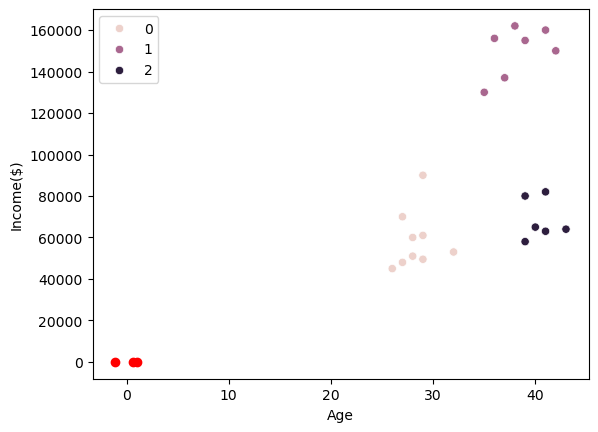

In [ ]:
km = KMeans(n_clusters=3, max_iter=20)
preds = km.fit_predict(scaled_df)



sns.scatterplot(data=df, x=df["Age"], y=df["Income($)"], hue=preds)


In [141]:
km.cluster_centers_

array([[-1.1247901 , -0.74862223],
       [ 0.60143983,  1.40141653],
       [ 0.98550535, -0.51205261]])

In [ ]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red")

#   to plot this you must change the dataframe to scaled one

In [ ]:
#   the elbow

In [144]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    sse.append(km.inertia_)

c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\V. Stasiunaitis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

In [ ]:
#   INERTIA:    A parameter to give a sum of square error ("Sum of squared error")
#           Basically the accuracy!!!!!

In [145]:
sse

[43.99999999999999,
 16.194890274706772,
 3.8893086571301425,
 3.641913128886153,
 2.2002272908434257,
 1.892481392031212,
 1.43978752209624,
 1.2050241226874139,
 0.9978910308310013]

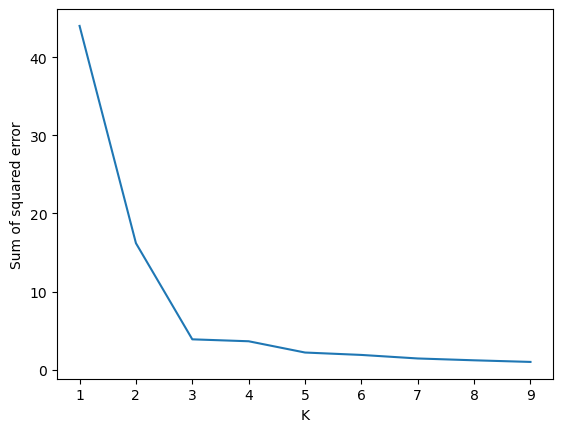

In [147]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)